# Quantum information and computing
## Exercise 4: Time Independent Schr&ouml;dinger equation
### Evolve numerically a system given the Hamiltonian:

$$\hat{H}=\hat{p}^2+\omega^2\hat{x}^2$$

1. $\hat{p}\to -i\hbar\frac{\partial}{\partial x}, \quad \hat{x}\to x$

2. From $\hat{H}\psi = E\psi$ you get: $$\left(-\frac{\hbar^2}{2}\frac{\partial^2}{\partial x^2} + \frac{1}{2}\omega^2 x^2\right)\psi(x) = E_n \psi(x)$$

$\psi(x)\equiv\psi_x$

3. The second derivative must be discretized applying finite difference method:
$$\begin{cases}
\psi_{k+1}=\psi_{k}+\psi^\prime_{k}dx+\frac{1}{2}\psi^{\prime\prime}_{k}dx^2+\frac{1}{6}\psi^{\prime\prime\prime}_k+ O(dx^4)\\
\psi_{k-1}=\psi_{k}-\psi^\prime_{k}dx+\frac{1}{2}\psi^{\prime\prime}_{k}dx^2-\frac{1}{6}\psi^{\prime\prime\prime}_k+ O(dx^4)
\end{cases}$$
$$\psi_k^{\prime\prime}=\frac{\psi_{k+1}-2\psi_{k}+\psi_{k-1}}{dx^2}$$
So we get:
$$-\frac{\hbar^2}{2}\left[\frac{\psi_{k+1}-2\psi_k + \psi_{k-1}}{dx^2}\right] + \frac{1}{2}\omega^2 x_k\psi_k = E \psi_k$$

4. Considering $H_{ij} =\,<x_i|H|x_j>$ the solution of the equation is equivalent to consider the following matrix in a eigenvalue problem:

$$H = \frac{\hbar^2}{2}\left(\begin{matrix}
\frac{2}{dx^2} + \frac{1}{2}\omega^2x_1^2 & \frac{1}{dx^2} & 0 & \dotsm & 0 \\
&&&&\\
\frac{1}{dx^2} & \frac{2}{dx^2} + \frac{1}{2}\omega^2x_2^2 & \frac{1}{dx^2} & \dotsm & 0 \\
&&&&\\
0 & \frac{1}{dx^2} &  \frac{2}{dx^2} + \frac{1}{2}\omega^2x_3^2 & \dotsm & 0 \\
\vdots & \vdots & \vdots &\ddots  & \vdots\\
0 & 0 & 0 & \dotsm  &  \frac{2}{dx^2} + \frac{1}{2}\omega^2x_N^2
\end{matrix}\right)$$


5. To get the eigenvalues this matrix must be then diagonalized.

In [1]:
# Usual imports
import matplotlib.pyplot as plt               # for plotting
import numpy as np                            # matrix handling


In [2]:
def potential(a,x):
    return a*x*x


In [5]:
x = np.arange(-2,2,0.01)


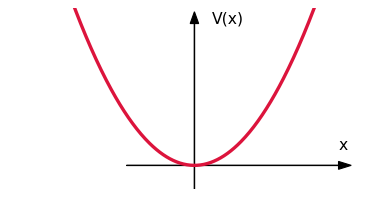

In [84]:
from matplotlib.pyplot import figure
figure(figsize=(6, 3), dpi=80)

plt.plot(x,potential(1,x),color='crimson',lw=3)
plt.axis('off')
plt.ylim(-0.3,2)
plt.text(.2,1.8,'V(x)',fontsize=14)
plt.text(1.7,.2,'x', fontsize=14)

plt.arrow(0,-0.5,0,2.3,width = 0.005,head_width=.1,color='black')
plt.arrow(-.8,0,2.5,0,width = 0.005,head_width=.1,color='black')

plt.savefig('./theory.svg', format='svg')

```fortran
  function qho_H_init(L,N,omega) result(H)
    real                                 :: L,omega,dx
    integer                              :: N, ii
    real*16, dimension(:,:), allocatable :: elem_real
    type(cmatrix)                        :: H
    dx = L/N
    
    allocate(elem_real(N+1,N+1))
    elem_real = 0 * elem_real ! Initialize everything to 0

    do ii=1, N+1, 1 ! ! diagonal elements
      elem_real(ii,ii) = ( 2 /(dx**2) ) + (omega**2)*((ii-1)*dx - L/2)**2
    end do

    do ii=2, N+1, 1 ! tridiagonal elements
      elem_real(ii,ii-1) = - 1/(dx**2)
      elem_real(ii-1,ii) = - 1/(dx**2)
    end do

    elem_real = 0.5* elem_real ! Everything must be divided by 2

    H = cmatrix_init(cmplx(X=elem_real,KIND=8))
  end function qho_H_init
```

```fortran
call ZGEEV(! To compute both eigenvalues and -vectors
           'V', 'V', &
           ! The order of the matrix A
           N, &   
           ! The matrix 
           A, & 
           ! The leading dimension of A.
           N, &   
           ! Where to store eigenvalues and eigenvectors
           eigenv, eigenh, & 
           ! Other parameters
           N, VR, N, WORK,LWORK,RWORK, &       
           ! Output parameter, if INFO == 0 -> successful exit
           INFO     )
```